In [1]:
import nltk
from nltk.corpus.reader.plaintext import *
#from nltk.corpus import stopwords
import collections
from nltk.util import ngrams

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import os

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [9]:
direc = 'Z:\\Documents\\Son Reader\\Corpus'
ext = '.txt'

In [16]:
corpus = {}

In [11]:
txt_files = [i for i in os.listdir(direc) if os.path.splitext(i)[1] == ext]

In [32]:
for txt in txt_files:
    with open(os.path.join(direc,txt)) as f:
        temp = ""
        for line in f:
            temp += line.replace('\n', ' ')
    corpus[txt[:7]] = temp

In [121]:
corpus

{'2006 Q1': "Thank you very much. I am Son of SoftBank. Recently every day from the morning until late I am very much focused on the mobile phone that really fills up my mind. Now, I look back the Vodafone KK, we are very happy that we could acquire Vodafone KK. I think it was a great timing and I think we were very lucky to be able to acquire Vodafone KK. It's a great company. I think it was one in a million opportunity for us. Of course, the competitors are great competitors and they're working very hard so it's not going to be easy competition or easy race, we fully know that. But in three years, five years or 10 years, I think that we are fully capable of competing and I am feeling more and more confident recently about, the key word now is adult SoftBank or mature SoftBank. So we're not going to be anything outrageous. But the four issues, or four challenges are network coverage enhancement to make sure that we have the coverage or so that you can have the connection over the time

#### so it looks like vectorizing the dictionary directly you only get keys as features. 
#### instead dump it all into one big bag of words list

In [55]:
bow = []
for key in corpus:
    bow.append(corpus[key])

In [60]:
cvec2 = CountVectorizer()
bow_vec = cvec2.fit(bow)
cvec2.get_feature_names()

[u'00',
 u'000',
 u'01',
 u'02',
 u'029',
 u'03',
 u'04',
 u'05',
 u'06',
 u'07',
 u'08',
 u'084',
 u'09',
 u'10',
 u'100',
 u'1000',
 u'100s',
 u'103',
 u'104',
 u'105',
 u'107',
 u'108',
 u'10x10',
 u'11',
 u'110',
 u'111',
 u'112',
 u'117',
 u'118',
 u'11th',
 u'12',
 u'120',
 u'123',
 u'125',
 u'13',
 u'130',
 u'134',
 u'136',
 u'137',
 u'138',
 u'139',
 u'13th',
 u'14',
 u'140',
 u'143',
 u'144',
 u'146',
 u'149',
 u'15',
 u'150',
 u'153',
 u'154',
 u'156',
 u'15x15',
 u'16',
 u'160',
 u'160a',
 u'164',
 u'165',
 u'166',
 u'167',
 u'16th',
 u'17',
 u'170',
 u'173',
 u'175',
 u'176',
 u'177',
 u'179',
 u'18',
 u'180',
 u'181',
 u'182',
 u'185',
 u'186',
 u'18th',
 u'19',
 u'190',
 u'197',
 u'1994',
 u'1995',
 u'1998',
 u'19th',
 u'1st',
 u'20',
 u'200',
 u'2000',
 u'2001',
 u'2001x',
 u'2002',
 u'2003',
 u'2004',
 u'2005',
 u'2006',
 u'2007',
 u'2008',
 u'2009',
 u'201',
 u'2010',
 u'2011',
 u'2012',
 u'2013',
 u'2014',
 u'2015',
 u'2016',
 u'2017',
 u'2018',
 u'2019',
 u'2020',
 u

#### our total number of features now makes sense

In [61]:
len(cvec2.get_feature_names())

6810

In [62]:
cvec2

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [63]:
count_matrix = cvec2.transform(bow)

In [64]:
tf = np.sum(count_matrix, axis=0)
x_tf = np.squeeze(np.asarray(tf))

In [65]:
term_freq_df = pd.DataFrame([x_tf], columns = cvec2.get_feature_names()).transpose()

In [69]:
term_freq_df.head()

,0
00,52
000,240
01,9
02,7
029,1


In [70]:
term_freq_df.index

Index([u'00', u'000', u'01', u'02', u'029', u'03', u'04', u'05', u'06', u'07',
       ...
       u'zero', u'zeros', u'zeus', u'zhongan', u'ziff', u'zone', u'zoom',
       u'zozo', u'zozotown', u'zynga'],
      dtype='object', length=6810)

In [71]:
term_freq_df.columns

RangeIndex(start=0, stop=1, step=1)

In [72]:
term_freq_df.values

array([[ 52],
       [240],
       [  9],
       ..., 
       [  2],
       [  8],
       [ 15]], dtype=int64)

In [73]:
term_freq_df.describe()

,0
count,6810.000000
mean,36.221880
std,312.719701
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,15294.000000


In [75]:
term_freq_df[0]

00              52
000            240
01               9
02               7
029              1
03               1
04               4
05               8
06               6
07               4
08               2
084              1
09               8
10             302
100            171
1000             6
100s             1
103              2
104              2
105              1
107              1
108              1
10x10            1
11              49
110              5
111              2
112              2
117              3
118              5
11th             3
              ... 
yesterday       21
yet             54
yield            2
ymobile          6
yodobashi        1
yokohama         1
york            10
yoshimoto        4
yoshinoya        1
you           1871
young           22
younger         14
your           178
yours            3
yourself        11
yourselves       1
youtube          5
yun              1
yurakucho        1
zaibatsu         2
zero            54
zeros       

In [77]:
term_freq_df.columns = ["A"]

In [78]:
term_freq_df.head()

,A
00,52
000,240
01,9
02,7
029,1


In [82]:
term_freq_df.sum()

A    246671
dtype: int64

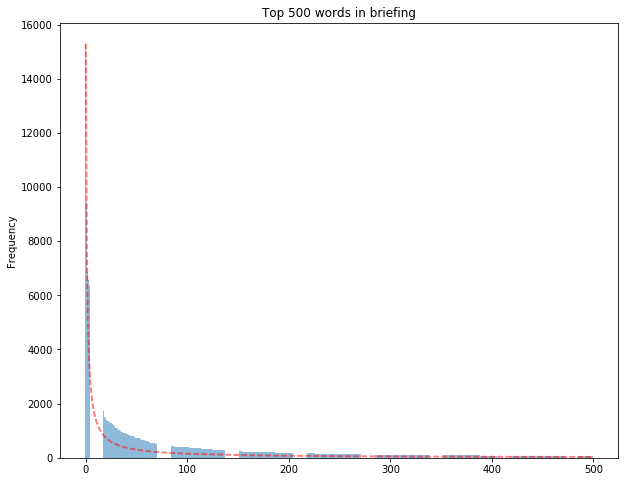

In [79]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by="A", ascending=False)["A"][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by="A", ascending=False)["A"][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 words in briefing')

C:\Anaconda2\lib\site-packages\pandas\core\indexes\base.py:2560: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  tz=getattr(series.dtype, 'tz', None))


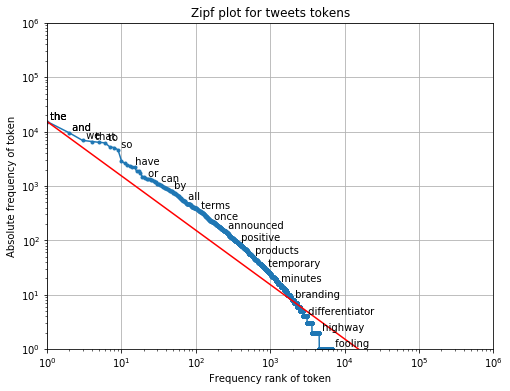

In [84]:
from pylab import *
counts = term_freq_df["A"]
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

### now remove the stop words

In [86]:
cvec3 = CountVectorizer(stop_words="english")
cvec3.fit(bow)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [88]:
count_matrix2 = cvec3.transform(bow)
tf2 = np.sum(count_matrix2, axis=0)
x_tf2 = np.squeeze(np.asarray(tf2))
term_freq_df2 = pd.DataFrame([x_tf2], columns = cvec3.get_feature_names()).transpose()
term_freq_df2.columns = ["A"]

In [89]:
term_freq_df2.sum()

A    108552
dtype: int64

In [108]:
term_freq_df2.head()

,A
00,52
000,240
01,9
02,7
029,1


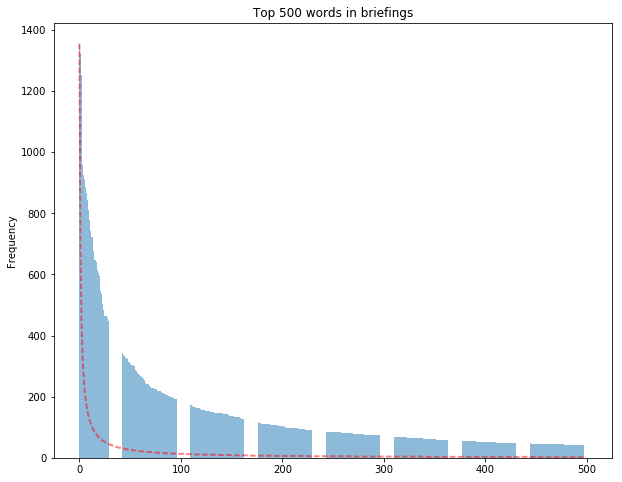

In [90]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df2.sort_values(by="A", ascending=False)["A"][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df2.sort_values(by="A", ascending=False)["A"][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 words in briefings')

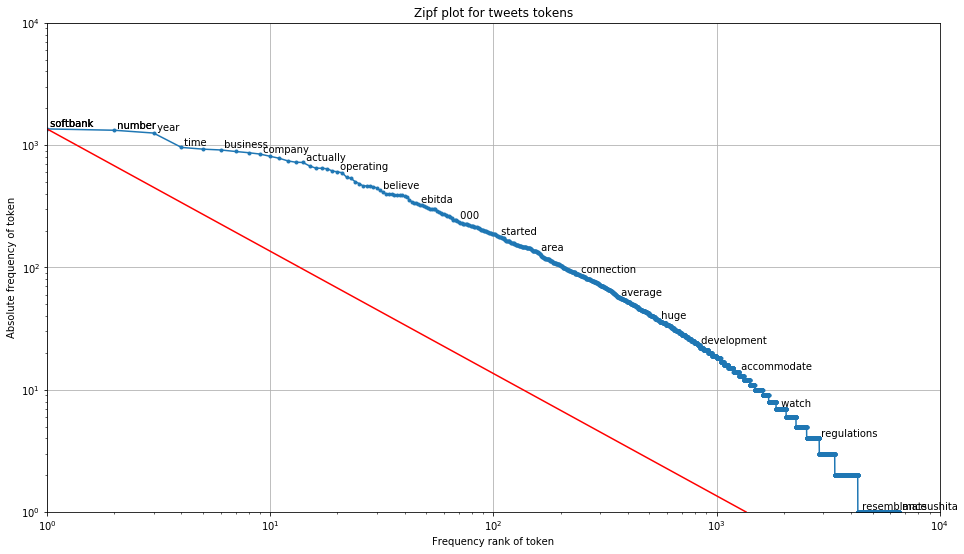

In [96]:
from pylab import *
counts = term_freq_df2["A"]
tokens = term_freq_df2.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(16,9))
plt.ylim(1,10**4)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

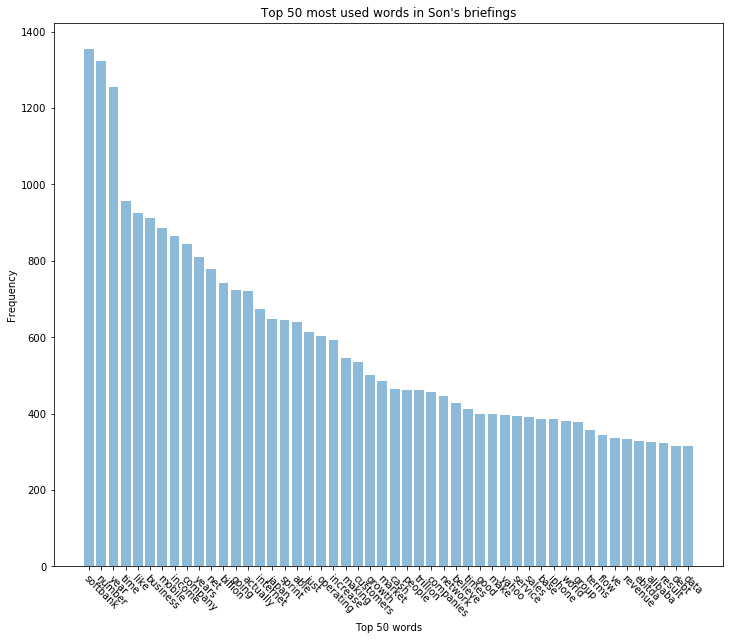

In [115]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='A', ascending=False)['A'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='A', ascending=False)['A'][:50].index, rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
plt.ylabel('Frequency')
plt.xlabel('Top 50 words')
plt.title("Top 50 most used words in Son's briefings")

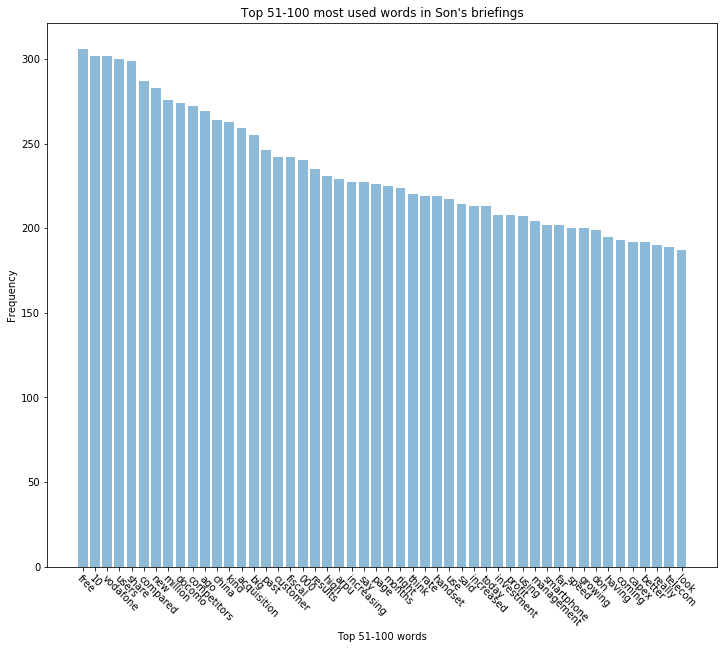

In [118]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='A', ascending=False)['A'][50:100], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='A', ascending=False)['A'][50:100].index, rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
plt.ylabel('Frequency')
plt.xlabel('Top 51-100 words')
plt.title("Top 51-100 most used words in Son's briefings")

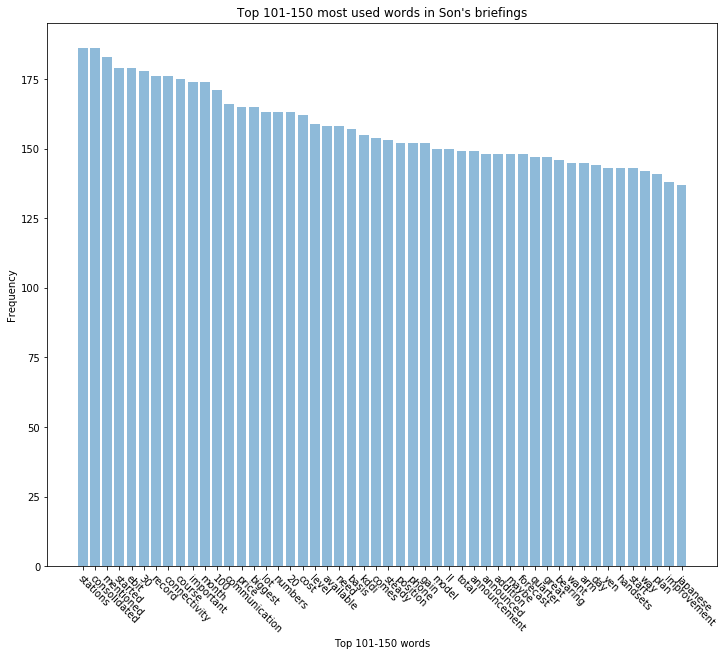

In [119]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='A', ascending=False)['A'][100:150], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='A', ascending=False)['A'][100:150].index, rotation=-45, rotation_mode = "anchor", horizontalalignment = "left")
plt.ylabel('Frequency')
plt.xlabel('Top 101-150 words')
plt.title("Top 101-150 most used words in Son's briefings")

# ignore all that is below

In [35]:
cvec = CountVectorizer()
x = cvec.fit_transform(corpus)

In [36]:
cvec.get_feature_names()

[u'2006',
 u'2007',
 u'2008',
 u'2009',
 u'2010',
 u'2011',
 u'2012',
 u'2013',
 u'2014',
 u'2015',
 u'2016',
 u'2017',
 u'q1',
 u'q2',
 u'q3',
 u'q4']

In [38]:
x.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0,

In [54]:
len(cvec.get_feature_names())

16

In [40]:
bigram_cvec = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1)
x_2 = bigram_cvec.fit_transform(corpus).toarray()

In [41]:
x_2

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [44]:
feature_index = bigram_cvec.vocabulary_.get('artificial intelligence')
print(feature_index)

None


In [45]:
x_2[:, feature_index] 

array([[[0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 1, 0, 0]],

       ..., 
       [[1, 1, 0, ..., 0, 0, 0]],

       [[1, 0, 1, ..., 1, 0, 0]],

       [[1, 0, 0, ..., 0, 1, 0]]], dtype=int64)

In [46]:
 from sklearn.feature_extraction.text import TfidfTransformer

In [47]:
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(x_2)

In [49]:
tfidf.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.37927638],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.36756328,
         0.        ,  0.        ],
       ..., 
       [ 0.53711941,  0.75342695,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53985648,  0.        ,  0.75726628, ...,  0.36756328,
         0.        ,  0.        ],
       [ 0.53985648,  0.        ,  0.        , ...,  0.        ,
         0.36756328,  0.        ]])

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
vectorizer = TfidfVectorizer()
x_3 = vectorizer.fit_transform(corpus)

In [53]:
x_3.toarray()

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.80774362,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.58953392],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.82583622,  0.56391005,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.81724834,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.57628565,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.81724834,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.57628565,
         0.        ],
       [ 0.        ,  0.        ,  0